# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [172]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [173]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [162]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [174]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [176]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [175]:
# check for missing values
data.isnull().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

In [106]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=10, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(str(iteration), str(data[0]), str(data[1])))
# Create k-folds
kf = KFold(X.shape[0], n_folds=10, random_state=0)

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    results.append(metrics.accuracy_score(y_test, y_pred_class))


Iteration                   Training set observations                   Testing set observations
    1     [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [0 1 2]         
    2     [ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [3 4 5]         
    3     [ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [6 7 8]         
    4     [ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23 24]        [ 9 10 11]        
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19 20 21 22 23 24]        [12 13 14]        
    6     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24]          [15 16]         
    7     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 21 22 23 24]          [17 18]         
    8     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22 23 24]          [19 20]         
    9     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 

In [183]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9939736455119518


In [ ]:
Al realizar un kfold cross validation se puede ver que el accuracy para las 10 muestras se encuentra al rededor el 99% lo cual
indica un buen ajuste del modelo ya que el 99% de los casos predichos estan clasificados correctamente.

In [76]:
#F1-Score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
print(metrics.confusion_matrix(y_test, y_pred_class))


[[13772     0]
 [  100     0]]


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

precision_score  0.0
recall_score     0.0
f1_score     0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
Debido a que el modelo no esta prediciendo correctamento la categoria de fraude, se presenta error en el calculo de la 
precision esto debido a que se encuentra las clases de esta variable desbalanceadas.

In [78]:
#F_Beta-Score (Beta=10)
from sklearn.metrics import fbeta_score
print('precision_score ', fbeta_score(y_test, y_pred_class, average=None, beta=10))

precision_score  [0.99992811 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

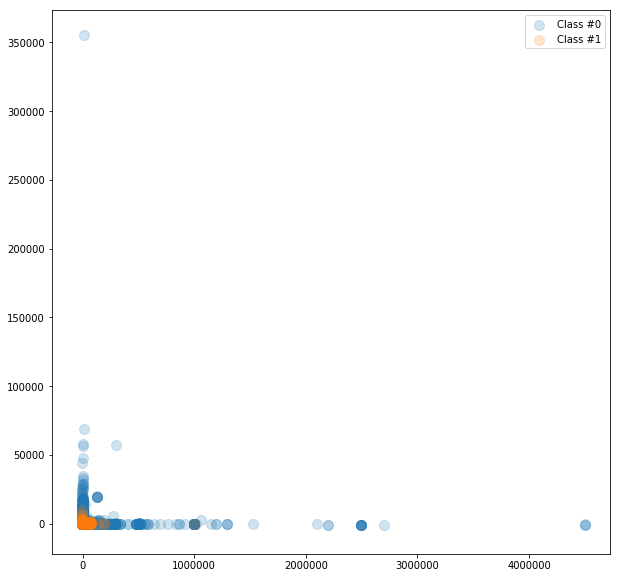

In [88]:
# Instanciate a PCA object for the sake of easy visualisation
from sklearn.decomposition import PCA
#plt.style.use('ggplot')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.2, s=100)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.2, s=100)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train)


In [ ]:
Graficamente no es puede ver claramente la division de las clases debido a que existen datos atipicos

In [80]:
#Under Sampling
n_samples = y_train.shape[0]
n_samples_1 = (y_train == 1).sum()
n_samples_1 / n_samples

0.005582743954697275

In [81]:
y_train.value_counts()

0    124152
1       697
Name: Label, dtype: int64

In [ ]:
Menos del 0.5% de los datos corresponde a la clase de fraude, lo que se puede concluir que las clases estan desbalanceadas y 
existe muy pocos datos  con los cuales el modelo prediga bien el fraude

In [185]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]


In [186]:
for target_percentage in [0.1, 0.2, 0.3, 0.47]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #plot_two_classes(X_u, y_u, size=(5, 5))
    #plt.show() 

Target percentage 0.1
y.shape =  5867 y.mean() =  0.10022157831941367
Target percentage 0.2
y.shape =  2939 y.mean() =  0.20006805035726438
Target percentage 0.3
y.shape =  1920 y.mean() =  0.30625
Target percentage 0.47
y.shape =  1222 y.mean() =  0.48117839607201307


In [84]:
y_u.value_counts()

0    762
1    697
Name: Label, dtype: int64

In [ ]:
Realizando under sampling es decir reduciendo aleatoreamente la clase que mas datos tuviera aproximadamente un 50% se obtuvo a 
la clase default con 697 datos y  no default con 765 datos. Se realiza nuevamente el modelo y se prueba a traves del accuracy

In [187]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_u, y_u)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5136818430841095


In [ ]:
Comparando los dos modelos se puede observar que el accuracy disminuye sustancialmente debido a que las clases no se encuentran 
desbalanceada y este modelo por ende ya se encuentra prediciendo la categoria defaul.

# Exercice 04.3

Now using random-over-sampling

In [188]:
import random
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 103452), (1, 103452)]


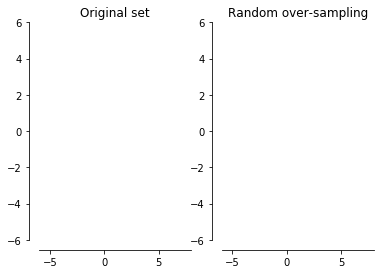

In [189]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)
X_res_vis = pca.transform(X_resampled)
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')
# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

#plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              #ncol=2, labelspacing=0.)
#plt.tight_layout(pad=3)
#plt.show()

In [190]:
# train a logistic regression model

logreg.fit(X_resampled, y_resampled)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5329719442922638


In [ ]:
Al igual que el punto anterior se puede ver al realizar el oversampling el accuracy del modelo dismuye sustancialmente
debido a que este se encuentra prediciendo la clase de default aunque este es mayor que en el undersampling

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [128]:
import random
from imblearn.over_sampling import SMOTE
ros = SMOTE()
X_smote, y_smote = ros.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 124152), (1, 124152)]


In [129]:
# train a logistic regression model

logreg.fit(X_smote, y_smote)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.3221597462514418


In [ ]:
El accuracy es inferiro que en el caso de oversampling y undersampling.

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeRegressor(),
          'nb': GaussianNB(),
          'nn': KNeighborsRegressor()}

In [132]:
for model in models.keys():
    models[model].fit(X_train, y_train)

In [134]:
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [142]:
# Evaluate each model
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lr 0.08490445135141556
dt 0.12051655130807698
nb 0.09717758628234809
nn 0.08974203707289623


In [143]:
#Evaluate the error of the mean of the predictions
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

0.08636494238556738

In [144]:
#Accuracy LogisticRegression
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.lr))

0.9927912341407151


In [146]:
#Accuracy DecisionTreeRegresso
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.nb))

0.9905565167243368


In [ ]:
#Accuracy KNeighborsRegressor
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.nb))

De acuerdo a lo anterior se puede concluir hasta el momento que el mejor modelo es una regresion logistica ya que es el que 
tiene el menor MSE y el mayor accuracy, seguido del KNeighborsRegressor. 

In [139]:
#F1 Score
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      0.32      0.48     13772
          1       0.01      0.87      0.02       100

avg / total       0.99      0.32      0.48     13872



# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [140]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

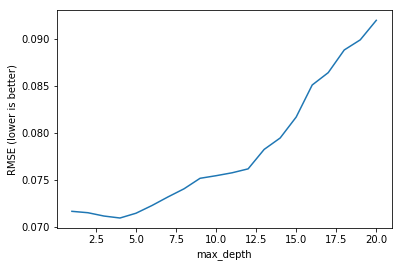

In [141]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [148]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.07096352767107293, 4)

In [ ]:
LA mejor separacion encontrada es 4

In [149]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [150]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
#Tuning n_estimators
#One important tuning parameter is n_estimators, which is the number of trees that should be grown. 
#It should be a large enough value that the error seems to have "stabilized".

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

KeyboardInterrupt: 

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# create a new feature matrix that only includes important features
X_important = SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X)

In [ ]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))